In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')


In [57]:
df = pd.read_csv('../data/datos_procesados_2.csv')
df.head()

,Año,Nº puertas,Potencia,Velocidad máxima,Aceleracion,Consumo,Emisiones,Largo,Ancho,Alto,...,Carroceria_Todoterreno,Carroceria_Monovolumen,Carroceria_Vehículo comercial,Carroceria_Pick Up,Carroceria_Descapotable,Carroceria_Coupé,Etiqueta_B,Etiqueta_Cero,Etiqueta_ECO,Etiqueta_Sin etiqueta
0,2019.0,5.0,150.0,212.0,8.7,4.5,117.0,4548.0,1816.0,1439.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2009.0,3.0,110.0,190.0,10.7,4.5,119.0,4199.0,1779.0,1469.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007.0,5.0,177.0,200.0,9.3,7.0,185.0,4395.0,1815.0,1720.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011.0,5.0,143.0,190.0,11.4,6.5,172.0,4629.0,1880.0,1653.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,5.0,313.0,250.0,5.3,6.4,169.0,4969.0,1911.0,1420.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df.columns

(41,)

In [59]:
X = df.drop(['Precio_log'], axis=1)
# Normalizo 
scaler_x = MinMaxScaler()
scaler_x.fit(X)

pickle.dump(scaler_x, open("../transformadores/MinMax.pk", 'wb'))


X = scaler_x.transform(X)

y = df['Precio_log']

X.shape, y.shape

((52062, 40), (52062,))

In [60]:
df.drop(['Precio_log','Largo','Ancho','Alto'], axis=1).columns

Index(['Año', 'Nº puertas', 'Potencia', 'Velocidad máxima', 'Aceleracion',
       'Consumo', 'Emisiones', 'KM_log', 'Combustible_Gasolina',
       'Combustible_Eléctrico', 'Combustible_Híbrido', 'Combustible_Otros',
       'Cambio_Manual', 'Cambio_Otro', 'Color_Beige', 'Color_Gris',
       'Color_Rojo', 'Color_Otro', 'Color_Amarillo', 'Color_Blanco',
       'Color_Naranja', 'Color_Marron', 'Color_Verde', 'Color_Violeta',
       'Color_Negro', 'Marca_encoded', 'Carroceria_Turismo',
       'Carroceria_Todoterreno', 'Carroceria_Monovolumen',
       'Carroceria_Vehículo comercial', 'Carroceria_Pick Up',
       'Carroceria_Descapotable', 'Carroceria_Coupé', 'Etiqueta_B',
       'Etiqueta_Cero', 'Etiqueta_ECO', 'Etiqueta_Sin etiqueta'],
      dtype='object')

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((41649, 40), (41649,), (10413, 40), (10413,))

In [62]:
from sklearn.ensemble import  RandomForestRegressor

rf_1 = RandomForestRegressor()
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
# Check training
y_pred_train = rf_1.predict(X_train)

pickle.dump(rf_1, open("../modelos_entrenados/ModeloRandomForest1.pk", 'wb'))

# rmse
from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE Train data {}'.format(rmse_train))


RMSE Train data 0.050920453408397515


In [65]:
# error test data
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE Test data {}'.format(rmse_test))

RMSE Test data 0.13703727071104194


In [66]:
# Check puntuacion traning data.
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Puntuacion entrenamiento: {}'.format(r2_score(y_train, y_pred_train)))

Puntuacion entrenamiento: 0.9907453919395652


In [67]:
y_pred_test = rf_1.predict(X_test)
print('Puntuacion Test: {}'.format(r2_score(y_test, y_pred_test)))

Puntuacion Test: 0.9342024762252537


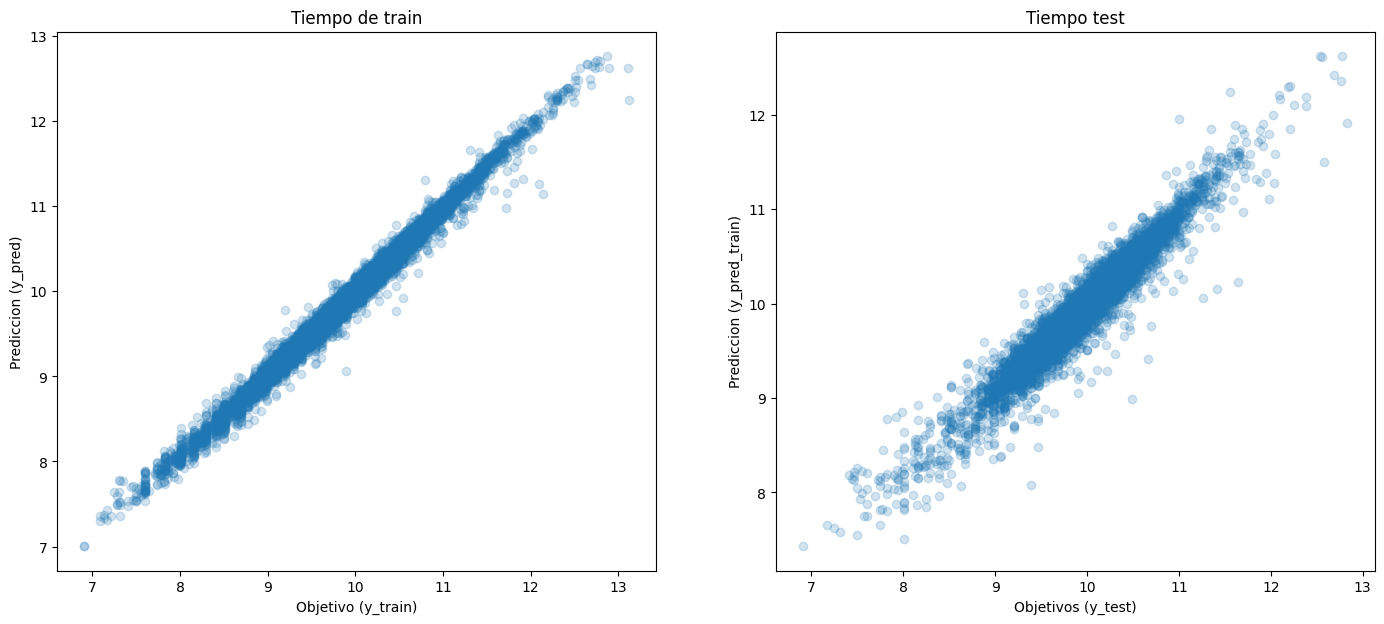

In [68]:
# plotting train
# check prediccion con valores originales
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Objetivo (y_train)');
plt.ylabel('Prediccion (y_pred)');
plt.title('Tiempo de train');

# plotting test error
y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Objetivos (y_test)');
plt.ylabel('Prediccion (y_pred_train)');
plt.title('Tiempo test');


Text(0.5, 1.0, 'Testting Residual PDF')

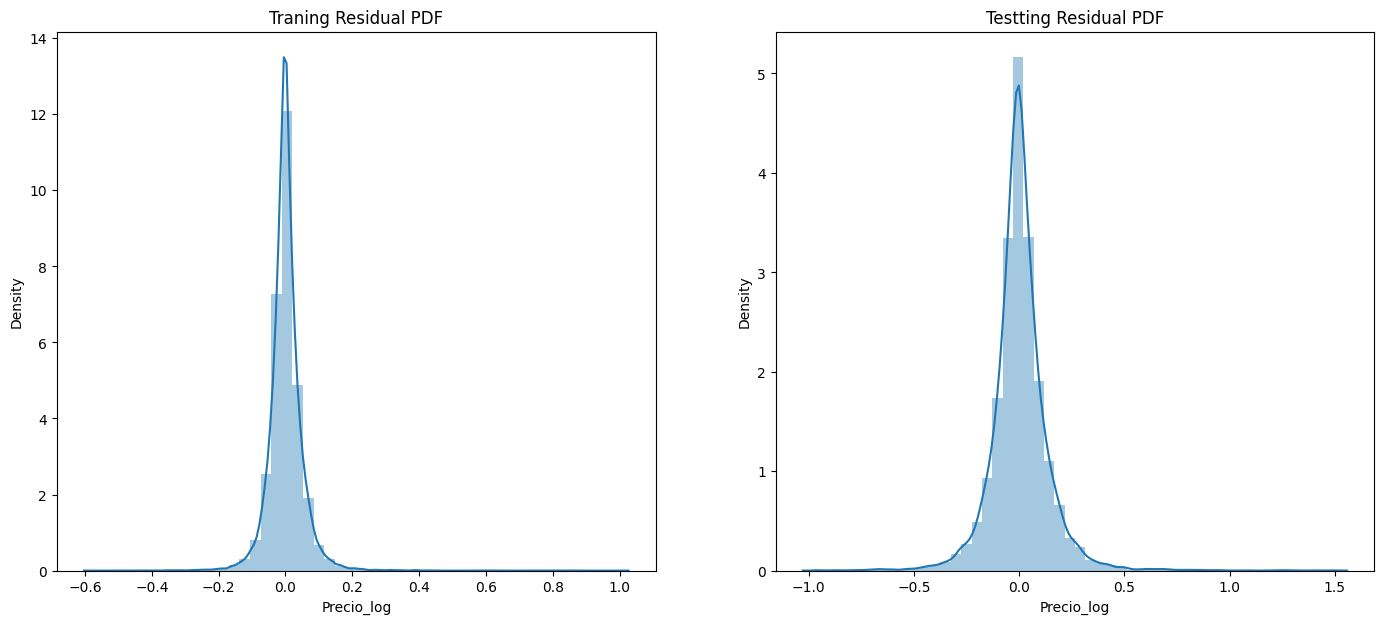

In [69]:
# plotting distribucion residual
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

# ploting en el entrenamiento
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train)
plt.title('Traning Residual PDF')

# ploting test
plt.subplot(1,2,2)
sns.distplot(residual_test)
plt.title('Testting Residual PDF')

In [70]:
# Crear df comparar resultados y prediccion 
df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediccion'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Objetivo'] = y_test

# creando columnas residual y difference
df_eval['Residual'] = df_eval['Objetivo'] - df_eval['Prediccion']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Objetivo']*100)
# check 
df_eval

,Prediccion,Objetivo,Residual,Difference%
0,10.211867,10.126271,-0.085596,0.845287
1,9.643085,9.679781,0.036697,0.379106
2,9.563185,9.729134,0.165949,1.705694
3,11.091145,11.000448,-0.090697,0.824482
4,9.464986,9.209440,-0.255546,2.774831
...,...,...,...,...
10408,10.458988,10.595409,0.136421,1.287551
10409,9.814124,9.814656,0.000532,0.005420
10410,10.335989,10.462846,0.126857,1.212455
10411,9.908516,9.887155,-0.021361,0.216048


In [71]:
df_eval.describe()

,Prediccion,Objetivo,Residual,Difference%
count,10413.000000,10413.000000,10413.000000,10413.000000
mean,9.925224,9.929116,0.003892,0.910886
std,0.512214,0.534263,0.136989,1.079994
min,7.429874,6.907755,-0.963591,0.000000
25%,9.626973,9.622516,-0.056567,0.243310
50%,9.911305,9.915959,-0.001409,0.587919
75%,10.231591,10.239638,0.060253,1.194945
max,12.623249,12.834684,1.494326,14.251042


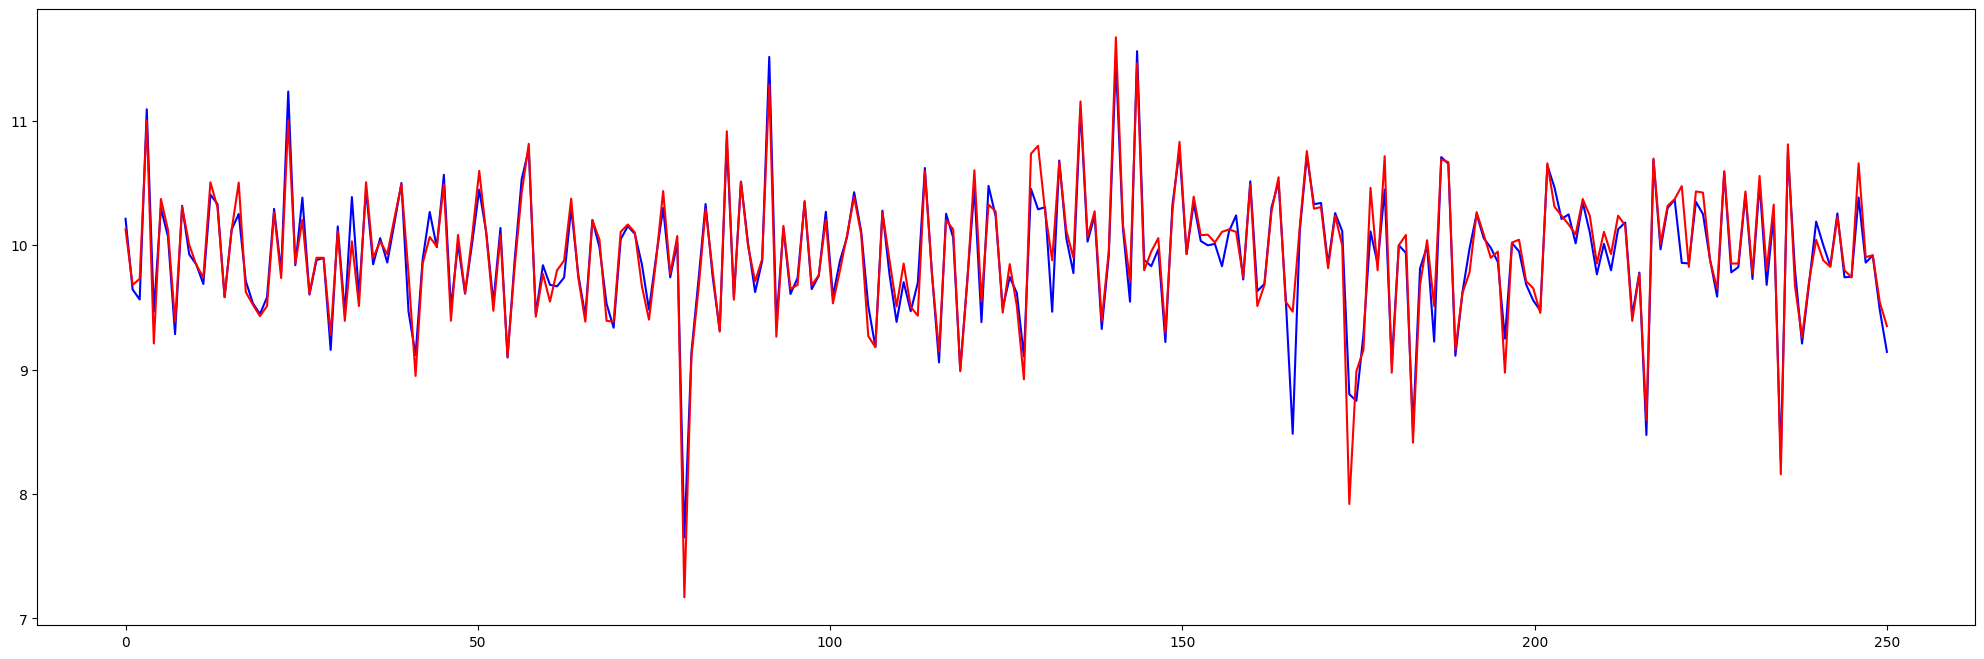

In [72]:
#Visualizar un indicador del tipo oscilador
X = np.linspace(0, 250, 250)
Y1 = df_eval["Prediccion"].head(250).values
Y2 = df_eval["Objetivo"].head(250).values

plt.figure(figsize = (25, 8))
# Plot de X**2
plt.plot(X, Y1, color="blue")
# Plot de X**3

plt.plot(X, Y2,color="red")


plt.show()

In [73]:
# Para guardar el modelo
#import joblib

#joblib.dump(rf_1, 'randomforest.pkl', compress=3)

In [74]:
X = np.linspace(0, 150, 150)
Y1 = df_eval["Prediccion"].head(150).values
Y2 = df_eval["Objetivo"].head(150).values

In [75]:
valores = np.concatenate((Y1,Y2))


indice1 =np.full(Y1.shape[0], fill_value="Predicción")
indice2 =np.full(Y2.shape[0], fill_value="Valor real")
indices = np.concatenate((indice1,indice2))

df_comparando = pd.DataFrame({'x': np.concatenate((X,X)),
                   'y': valores,
                   'grupo' : indices})

In [76]:
fig =  px.line(df_comparando, x = 'x', y = 'y', color = 'grupo')

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
)

fig.show()